### Problem statment:

With increased number of energy reports from international and business organizations, it is now necessary to have an idea where trends are heading in the energy debate. 

One way to see were trends are is to get the main keywords or the main themes of discussions through processing words from published energy reports. 

### The Goal

produce a wordbacg for each report to define the center of discussion of the document and plot a bar plot of the most frequent words.



In [1]:
#!pip install PyPDF2

In [1]:
text_to_analyze = """
We, the Heads of State and Government of Member Countries of the Gas Exporting Countries Forum (GECF), at the invitation of His Highness Sheikh Tamim Bin Hamad Al-Thani, the Amir of the State of Qatar, gathered in Doha on 22 February 2022 for the 6th GECF Summit in the spirit of solidarity and cooperation enshrined in the Statute of the GECF

i)	Recalling: 

The Declarations of the GECF Summits held in Doha, the State of Qatar, in 2011; Moscow, the Russian Federation, in 2013; Tehran, Islamic Republic of Iran, in 2015; Santa Cruz de la Sierra, Plurinational State of Bolivia, in 2017; and Malabo, Republic of Equatorial Guinea, in 2019;

ii)	Reaffirming: 

a.	The absolute and permanent sovereign rights of Member Countries over their natural gas resources;

b.	The willingness of the GECF Member Countries to develop their natural gas resources for the benefit of both producers and consumers;

c.	The commitment to the objectives of the GECF, and the intention to enhance its role;

iii)	Acknowledging:

a.	The pivotal role of natural gas in satisfying world energy needs, and in achieving all the United Nations Sustainable Development Goals, in particular in ensuring access to affordable, reliable, sustainable, and modern energy for all; 

b.	The growing share of natural gas in the global energy mix as the fuel of choice, and its importance for economic development, social progress, and the protection of the environment; 

c.	The positive contributions of eco-friendly use of natural gas toward improving air quality and climate change mitigation and adaptation, in line with the United Nations Framework Convention on Climate Change and the Paris Agreement; 

d.	The leading position of Member Countries, who enjoy the largest share of natural gas resources, production, and trade in the world; 

e.	The increasing pace of global energy transitions and advancement of modern technologies, which unleash great potential of natural gas as a viable fuel, to enhance global energy security, eradicate energy poverty, and build flexible, resilient and sustainable energy systems, in synergy with other energy sources;

f.	The crucial importance of continued investment in and development of natural gas resources and related infrastructures to ensure energy security and resilient energy systems;

g.	The negative impact of extreme market volatility on natural gas demand and its affordability, and the need for far-sighted energy policies that embed natural gas as a reliable and flexible source for baseload energy generation;

h.	The importance of security of demand, transparent, non-discriminatory legal frameworks and predictable energy, trade, fiscal, and environmental policies in gas consuming and transit countries. 

iv)	Reiterating:

a.	The determination to strengthen global energy security as reliable suppliers of natural gas to meet the world’s growing energy demand;

b.	The importance of coordination and cooperation within and between Member Countries, and the dialogue between producers, consumers and other relevant stakeholders, for the promotion of international cooperation aimed at ensuring the viability and sustainability of gas markets;

c.	The strategic role of the development, deployment, and transfer of advanced technologies for more effective production and utilisation of natural gas with the objective to enhance its economic and environmental benefits;

d.	The importance of long-term gas and LNG contracts, and equitable and stable prices in support of continued investments in the vital global gas industry.

v)	Expressing:

a.	Our appreciation to the people, who worked under difficult conditions created by the COVID-19 pandemic to keep the natural gas systems reliable and resilient;

b.	Our determination to continue working together and overcome the negative consequences of the COVID-19 pandemic to provide efficient and reliable gas supplies and further develop the gas industry;

c.	Our deep concern and disagreement in regards to unilateral economic restrictions undertaken without the approval of the United Nations Security Council and extraterritorial application of national laws and regulations against GECF Member Countries that negatively affect the development and trade of natural gas;

d.	Our concern on the use of the climate agenda to perpetuate inequality, the introduction of discriminatory practices, and the instigation of protectionist measures in direct contravention of global trade rules. 

Inspired by the Declarations of our previous Summits and guided by the GECF Statute, collectively resolve to:

1.	Promote natural gas as an abundant, affordable, clean, and reliable source of energy, and as the fuel of choice to satisfy the growing world energy needs, and to address climate change and improve air quality; 

2.	Encourage the expanded use of natural gas domestically and internationally to address the gap in achieving Sustainable Development Goal 7, which affects the most vulnerable; 

3.	Strengthen natural gas’ environmental credentials, in particular through efforts to reduce gas flaring and methane emissions, and the development of eco-friendly technologies, including carbon capture, utilisation, and storage;

4.	Pursue the necessary steps for natural gas to be treated as an environmentally friendly good in climate and investment regulations, international banking and global trade. Furthermore, to work with relevant stakeholders to co-develop joint initiatives for climate action, especially in view of COP27 Climate Change Conference, which will be hosted by Egypt this year;

5.	Improve conditions for the international trade of gas, based on the most effective and efficient practices; 

6.	Work towards increasing the share of natural gas in maritime and land transport, and to develop necessary infrastructure to provide natural gas to consumers; 

7.	Support the fundamental role of long-term gas contracts as well as the gas pricing based on oil/oil products indexation to ensure stable investments in development of natural gas resources;

8.	Augment the positioning of the GECF by increasing its global visibility, attracting new members, promoting partnerships, facilitating dialogue between producers and consumers, and broadening cooperation with relevant international organisations and entities; 

9.	Harness the position of the GECF as the leading platform for its Member Countries to cooperate and coordinate on natural gas matters by further developing the Forum’s expertise, and mechanisms for joint undertakings;

10.	Expand cooperation in natural gas technologies, scientifically-guided research, and innovation-led capacity-building, inter alia, through the GECF Gas Research Institute; 

11.	Explore new areas of cooperation within the GECF with a goal to leverage the advantages of natural gas for hydrogen production as well as production and utilisation of new gases;

12.	Collaborate within the GECF as well as with consumers and transit countries to protect critical gas infrastructure and to enhance resilience to natural disasters, technological incidents, and man-made threats, such as malicious use of information and communication technologies.
"""

In [2]:
import os
import pandas as pd
import sys
import re
import time
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import seaborn as sns
from nltk.stem import WordNetLemmatizer




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Required Functions to define


In [3]:
#required functions to define

## get the count of pages
def getPageCount(pdf_file):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pages = pdfReader.numPages
    return pages


## extract data from the pdf 
def extractData(pdf_file, page):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageObj = pdfReader.getPage(page)
    data = pageObj.extractText()
    return data


## count the words
def getWordCount(data):

    data=data.split()
    return len(data)


#remove special characters
def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',', '\n', '%']
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)


In [4]:
# full code 

def doc_to_cloud(doc_location, stem):
    
    """
    The function takes in a pdf file and the preference to use stemmed text or tokenized text 
    
    The return is a word cloud of the desired document
    
    """
        
    numPages = getPageCount(doc_location)
    
    text_total = " "
    for i in range(numPages):
        text = extractData(doc_location, i)
        text_total = text_total+text

    # remove special charachters 
    text_total = remove_special(text_total)
    
    #create a lower case words
    text_total = text_total.lower()
    
    
    #Tokenize 
    text_total = word_tokenize(text_total)
    
    #remove specific terms
    text_total = [e for e in text_total if e not in ('in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will', 
                                                    'and', 'for', 'on', 'at', 'that', 'be', 'are', 'is', 
                                                    'its', 'than', 'this', 'their', 'these', 'as', 'also'
                                                    ,'an')]
    
    
    # stemming
    stemmed_text = []
    porter = PorterStemmer()
    for x in text_total:
        x = porter.stem(x)
        stemmed_text.append(x)
        
    
    #declare global variable to be used for the word count plot latter
    global text_total_tocloud
    
    #condition to decide if use tokenized text or stemmed text 
    if stem == 1:
        text_total_tocloud = stemmed_text
    else:
        text_total_tocloud = text_total
    
    # join total text in a single sentence
    text_total_tocloud = " ".join(text_total_tocloud)
    
    
    # create a wordCloud
    # visualization of the stemmed sentences

    wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,background_color='white',
                             max_font_size = 100).generate(text_total_tocloud)
    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud_low)
    plt.tight_layout(pad = 0)
    plt.show()
    

In [10]:
# full code 

##TEXT defined in the workbook

def text_to_cloud(text_obj, stem):
    
    """
    The function takes in a text object and the preference to use stemmed text or tokenized text 
    
    The return is a word cloud of the desired document
    
    """
        
    # remove special charachters 
    text_total = remove_special(text_obj)
    
    #create a lower case words
    text_total = text_total.lower()
    
    
    #Tokenize 
    text_total = word_tokenize(text_total)
    
    #remove specific terms
    text_total = [e for e in text_total if e not in ('in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will', 
                                                    'and', 'for', 'on', 'at', 'that', 'be', 'are', 'is', 
                                                    'its', 'than', 'this', 'their', 'these', 'as', 'also'
                                                    ,'an')]
    
    # stemming
    stemmed_text = []
    porter = PorterStemmer()
    for x in text_total:
        x = porter.stem(x)
        stemmed_text.append(x)
        
    # lemitization
    lem_text = []
    lemmatizer = WordNetLemmatizer()
    for x in text_total:
        x = lemmatizer.lemmatize(x)
        lem_text.append(x)
        
    
    #declare global variable to be used for the word count plot latter
    global text_total_tocloud
    
    #condition to decide if use tokenized text or stemmed text 
    if stem == 1:
        text_total_tocloud = stemmed_text
    
    elif stem ==2:
        text_total_tocloud = lem_text
        
    else:
        text_total_tocloud = text_total
    
    # join total text in a single sentence
    text_total_tocloud = " ".join(text_total_tocloud)
    
    
    # create a wordCloud
    # visualization of the stemmed sentences

    wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,background_color='white',
                             max_font_size = 100).generate(text_total_tocloud)



    
    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud_low)
    plt.tight_layout(pad = 1)
    plt.show()

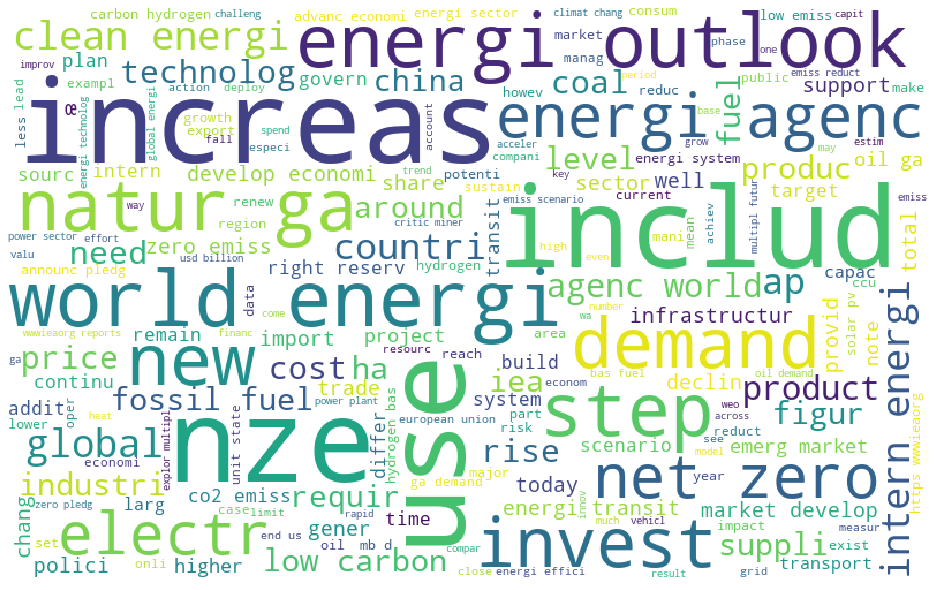

In [26]:
doc_to_cloud('IEA - World Energy Outlook 2021.pdf', 1)

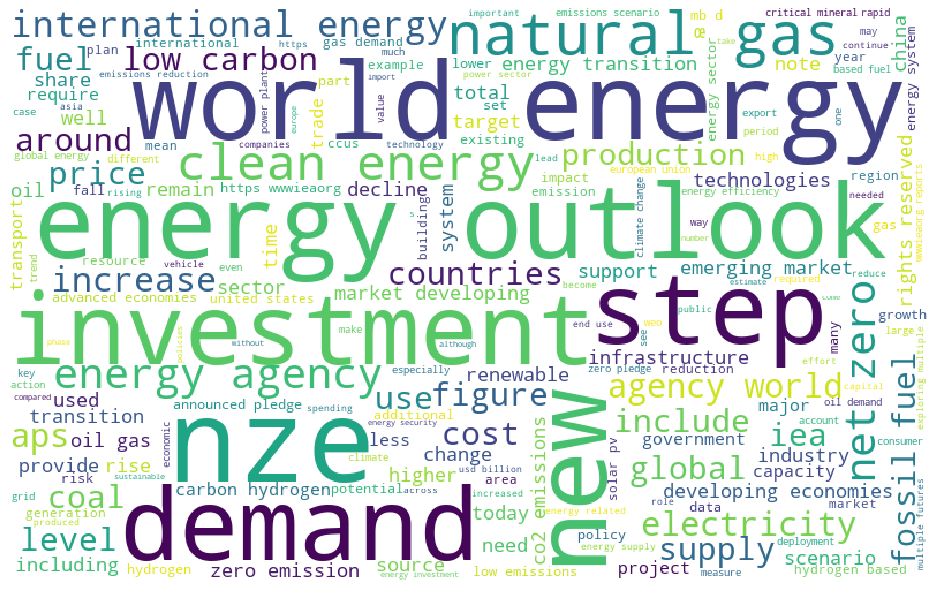

In [29]:
doc_to_cloud('IEA - World Energy Outlook 2021.pdf', 2)

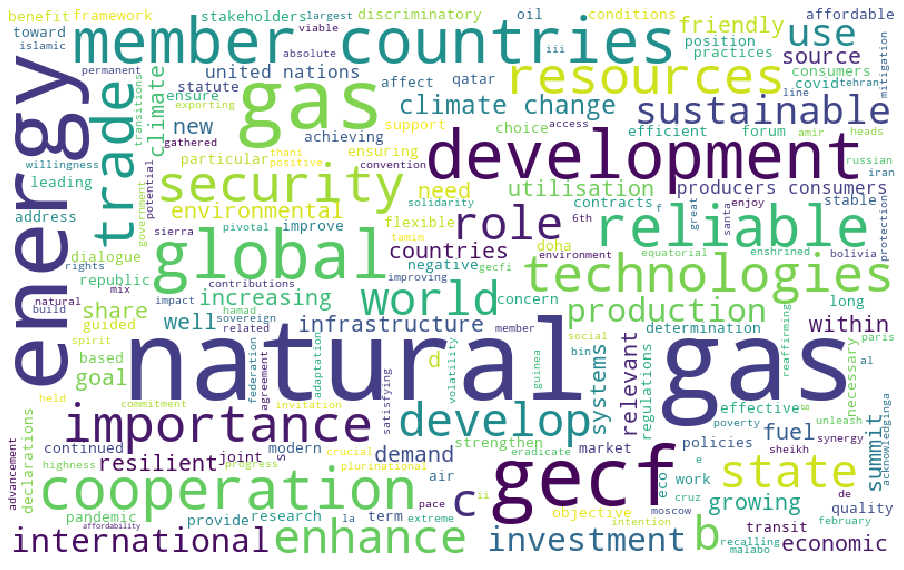

In [11]:
text_to_cloud(text_to_analyze, 0)

### Count the occurance of each word in the text

In [18]:
# Required functions

# count the words in the stemmed or the tokenied text 
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


# plot the outcome
def word_count_plot(dataf, plot_title):    
    sns.catplot(
        data=dataf,
        x='word',
        y='word count',
        kind = 'bar',
        height=5, # make the plot 5 units high
        aspect=3); # height should be three times width
    plt.title(plot_title )
    plt.xticks(rotation=90, fontsize= 10)

    plt.show()

In [19]:
# full code 


def plot_of_counts(text, plot_title, number_of_repeats_to_ignore):
    
    #create the word counts dictionary of the analyzed text
    word_count_dic = word_count(text)
    
    # create a dataframe of the dictionary 
    total_text_count = pd.DataFrame.from_dict(word_count_dic, orient ='index')
    
    # reset index of the dataframe
    total_text_count.reset_index(inplace = True)
    
    # rename dataframe columns
    total_text_count.columns = ['word', 'word count']
    
    #remove "in, a, is, the, of, to, by, from"
    #words_to_remove = ['in', 'a', 'is', 'the', 'of', 'to', 'by', 'from', 'will']
    #total_text_count = total_text_count[~total_text_count['word'] not in(words_to_remove)]
    
    
    #choose only words that are repeated more than x times
    total_text_count_x = total_text_count[total_text_count['word count']>number_of_repeats_to_ignore]
    
    # sort values
    total_text_count_x = total_text_count_x.sort_values('word count',  ascending=False)
    
    #plot the outcome
    word_count_plot(total_text_count_x, plot_title) 


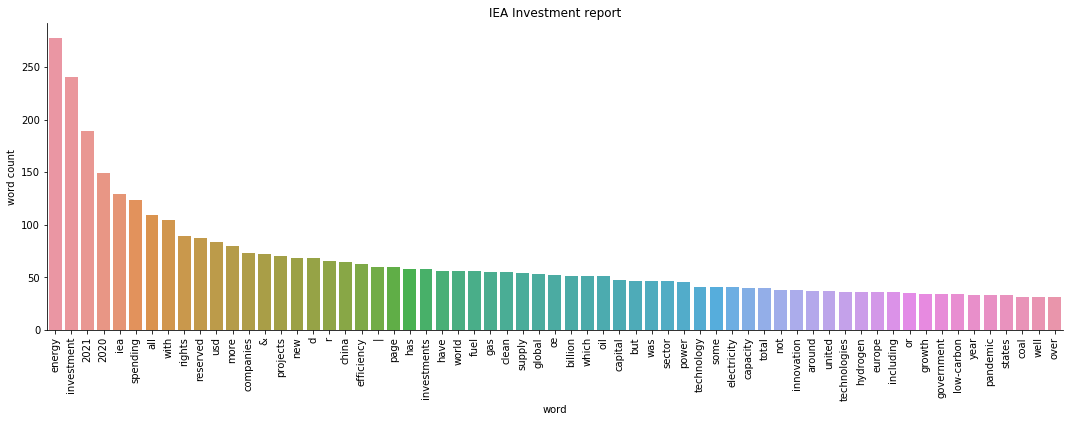

In [24]:
plot_of_counts(text_total_tocloud, 'IEA Investment report', 30)